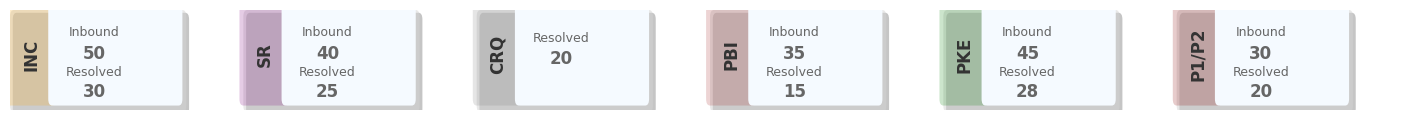

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
import matplotlib.patheffects as patheffects

# Use default font (DejaVu Sans)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 9

# Sample DataFrame
data = pd.DataFrame({
    "Category": ["INC", "SR", "CRQ", "PBI", "PKE", "P1/P2"],
    "Inbound": [50, 40, None, 35, 45, 30],
    "Resolved": [30, 25, 20, 15, 28, 20]
})

# Icon Mapping (icons removed, only titles and colors for background remain)
ICON_MAP = {
    "INC": ("", "INC", "orange"),     # Incident
    "SR": ("", "SR", "purple"),       # Service Request
    "CRQ": ("", "CRQ", "gray"),       # Change Request
    "PBI": ("", "PBI", "brown"),      # Problem Management
    "PKE": ("", "PKE", "green"),      # Problem Known Error
    "P1/P2": ("", "P1/P2", "darkred") # High Priority
}

# Figure Settings
fig, ax = plt.subplots(figsize=(14, 1))  # Reduced figure height
ax.set_xlim(0, len(data) * 1.8)  # Increased spacing between cards
ax.set_ylim(0, 0.45)  # Tightened ylim to remove extra space
ax.axis("off")

# Card Styling
card_width = 1.3
card_height = 0.4  # Reduced height
card_color = "#F5FAFF"  # Main card color
shadow_color = "#D3D3D3"  # Gray shadow color
colored_width = card_width * 0.25  # 25% of card width (0.275)

# Draw Cards
for i, row in data.iterrows():
    x = i * 1.8  # Increased spacing

    # Shadow (adjusted for smaller height)
    shadow_offset = 0.03
    shadow = patches.FancyBboxPatch((x + shadow_offset, 0.05 - shadow_offset), card_width, card_height,
                                    boxstyle="round,pad=0.03", fc=shadow_color, ec="none", alpha=0.5,
                                    path_effects=[patheffects.withSimplePatchShadow()])
    ax.add_patch(shadow)

    # Left 25% of the card in a separate color (using category color with reduced opacity)
    _, title, color = ICON_MAP[row["Category"]]  # Icon ignored
    colored_patch = patches.FancyBboxPatch((x, 0.05), colored_width, card_height,
                                           boxstyle="round,pad=0.03", fc=color, alpha=0.2, ec="none")
    ax.add_patch(colored_patch)

    # Right 75% of the card in the original background color
    main_patch = patches.FancyBboxPatch((x + colored_width, 0.05), card_width - colored_width, card_height,
                                        boxstyle="round,pad=0.03", fc=card_color, ec="none", alpha=1)
    ax.add_patch(main_patch)

    # Title in the left 25% colored section (centered vertically, distinct color)
    title_y = 0.05 + card_height / 2  # Center of the reduced card height
    title_text = ax.text(x + colored_width / 2, title_y, f"{title}", fontsize=12, fontweight="bold",
                         ha="center", va="center", color="#333333", rotation=90)  # Dark gray for title

    # Inbound and Resolved Counts (adjusted for smaller height, uniform gray color)
    y_text = 0.35  # Adjusted starting point
    if pd.notna(row["Inbound"]):
        ax.text(x + card_width / 2, y_text, "Inbound", fontsize=9, ha="center", va="center", color="#666666")
        ax.text(x + card_width / 2, y_text - 0.1, int(row["Inbound"]), fontsize=12, fontweight="bold",
                ha="center", va="center", color="#666666")
        y_text -= 0.15

    if pd.notna(row["Resolved"]):
        ax.text(x + card_width / 2, y_text-0.03, "Resolved", fontsize=9, ha="center", va="center", color="#666666")
        ax.text(x + card_width / 2, y_text - 0.12, int(row["Resolved"]), fontsize=12, fontweight="bold",
                ha="center", va="center", color="#666666")

# Final Touches
plt.tight_layout(pad=0)  # Remove extra padding around the plot
plt.savefig("card_view_title_distinct_gray_content.png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()

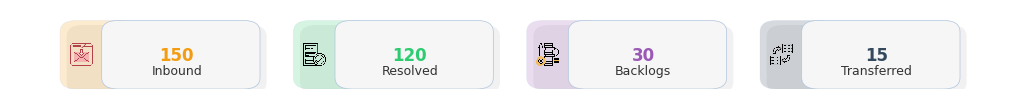

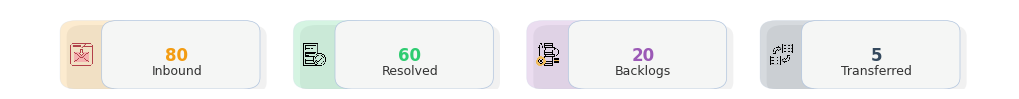

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Set professional font and base size
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 9

# Sample DataFrame with both INC and SR
data = pd.DataFrame({
    "Category": ["INC", "SR"],
    "Inbound": [150, 80],
    "Resolved": [120, 60],
    "Backlogs": [30, 20],
    "Transferred": [15, 5]
})

# Metric Colors and Image Paths
METRIC_COLORS = {
    "Inbound": "#F39C12",
    "Resolved": "#2ECC71",
    "Backlogs": "#9B59B6",
    "Transferred": "#34495E"
}

icon_path = '/content/drive/MyDrive/Colab Notebooks/icons/'

METRIC_IMAGES = {
    "Inbound": icon_path + "inbound.png",      # Path to your Inbound icon image
    "Resolved": icon_path + "resolved.png",    # Path to your Resolved icon image
    "Backlogs": icon_path + "backlogs.png",    # Path to your Backlogs icon image
    "Transferred": icon_path + "transferred.png"  # Path to your Transferred icon image
}

# Function to create a plot for given data row
def create_plot(row, filename):
    # Figure Settings
    fig, ax = plt.subplots(figsize=(10, 0.8))
    ax.set_xlim(0, 3.0)
    ax.set_ylim(0, 0.35)
    ax.axis("off")

    # Metrics as Inner Cards
    metrics = [
        ("Inbound", int(row["Inbound"]), METRIC_COLORS["Inbound"], METRIC_IMAGES["Inbound"]),
        ("Resolved", int(row["Resolved"]), METRIC_COLORS["Resolved"], METRIC_IMAGES["Resolved"]),
        ("Backlogs", int(row["Backlogs"]), METRIC_COLORS["Backlogs"], METRIC_IMAGES["Backlogs"]),
        ("Transferred", int(row["Transferred"]), METRIC_COLORS["Transferred"], METRIC_IMAGES["Transferred"])
    ]

    x_pos = 0.2  # Starting position for inner cards
    card_width = 0.5  # Total width of each inner card
    card_height = 0.2  # Height of each inner card
    spacing = 0.2  # Space between inner cards
    colored_width = card_width * 0.25  # 25% of card width (0.125)
    shadow_offset = 0.02  # Offset for shadow effect

    # Calculate zoom based on card dimensions (reduced size)
    zoom_factor = min(colored_width, card_height) / 4  # Reduced from /2 to /4 for smaller icons

    for metric_name, value, color, image_path in metrics:
        # Draw shadow for the card
        shadow = patches.FancyBboxPatch((x_pos + shadow_offset, 0.05 - shadow_offset), card_width, card_height,
                                        boxstyle="round,pad=0.05", fc="#D3D3D3", ec="none", alpha=0.3)
        ax.add_patch(shadow)

        # Draw left 25% of the card in a separate color (using metric color with reduced opacity)
        colored_patch = patches.FancyBboxPatch((x_pos, 0.05), colored_width, card_height,
                                               boxstyle="round,pad=0.05", fc=color, alpha=0.2, ec="#B0C4DE", lw=0.5)
        ax.add_patch(colored_patch)

        # Draw right 75% of the card in the original background color
        main_patch = patches.FancyBboxPatch((x_pos + colored_width, 0.05), card_width - colored_width, card_height,
                                            boxstyle="round,pad=0.05", fc="#F5F6F5", ec="#B0C4DE", lw=0.5)
        ax.add_patch(main_patch)

        # Add image icon in the middle of the left 25% colored section
        img = plt.imread(image_path)  # Load the image
        imagebox = OffsetImage(img, zoom=zoom_factor)  # Dynamic zoom based on card size
        ab = AnnotationBbox(imagebox, ((x_pos + colored_width / 2)-0.05, 0.05 + card_height / 2), frameon=False, pad=0)
        ax.add_artist(ab)

        # Add metric name below the image (centered vertically in the 25% section)
        ax.text((x_pos + card_width / 2)+0.05, 0.05 + card_height / 2 - 0.07, f"{metric_name}", fontsize=9, fontweight="medium",
                ha="center", va="center", color="#333333")  # Dark gray for title, slightly offset below icon

        # Add count centered across the whole card (on a separate line)
        ax.text((x_pos + card_width / 2)+0.05, 0.15, f"{value:,}", fontsize=12, fontweight="bold",
                ha="center", va="center", color=color)  # Metric-specific color for count

        x_pos += card_width + spacing  # Move to next position with spacing

    # Final Touches
    fig.patch.set_facecolor("#FFFFFF")
    plt.tight_layout(pad=0)

    # Display and Save
    plt.savefig(filename, bbox_inches="tight", pad_inches=0.01, transparent=False)
    plt.show()

# Create plots for INC and SR from the same DataFrame
create_plot(data.iloc[0], "horizontal_split_inner_cards_inc_with_scaled_images.png")  # INC (row 0)
create_plot(data.iloc[1], "horizontal_split_inner_cards_sr_with_scaled_images.png")   # SR (row 1)